In [21]:
import os 
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from pyogrio import read_dataframe
import time
import glob 
import plotly.graph_objects as go
import pandas as pd
import warnings


In [37]:
Pth_hg          = r"/Users/yuhan/Desktop/Gradient_Boost_code/inputs/gis_data/census/Houston-galveston.shp"
#Geodata = gpd.read_file(fp)
read_start      = time.process_time()
HG_geodata      = read_dataframe( Pth_hg )
read_end        = time.process_time()
HG_geodata      = HG_geodata.to_crs({'init':'epsg:4326'})
HG_geodata.columns

/Users/yuhan/opt/anaconda3/envs/hazard_env/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Index(['NRI_ID', 'STATE', 'STATEABBRV', 'STATEFIPS', 'COUNTY', 'COUNTYTYPE',
       'COUNTYFIPS', 'STCOFIPS', 'TRACT', 'TRACTFIPS',
       ...
       'WNTW_ALRP', 'WNTW_ALRA', 'WNTW_ALR_N', 'WNTW_RISKV', 'WNTW_RISKS',
       'WNTW_RISKR', 'NRI_VER', 'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object', length=469)

In [38]:
HG_geodata.TRACTFIPS.head()

0    48039660100
1    48039660200
2    48039660301
3    48039660302
4    48039660303
Name: TRACTFIPS, dtype: object

In [39]:
HG_geodata.COUNTY.unique()

array(['Brazoria', 'Chambers', 'Fort Bend', 'Galveston', 'Harris',
       'Liberty', 'Montgomery', 'Waller'], dtype=object)

In [40]:
pth_f = r"/Users/yuhan/Desktop/Gradient_Boost_code/inputs/travel/joined_weekly_mobility.csv"
travel_daily_dfx  = pd.read_csv( pth_f )

travel_daily_dfx['geoid_o'] = travel_daily_dfx['geoid_o'].apply(int).apply(str)
travel_daily_dfx['geoid_d'] = travel_daily_dfx['geoid_d'].apply(int).apply(str)


In [41]:
print( travel_daily_dfx.head() )

   index      geoid_o      geoid_d      lng_o      lat_o      lng_d  \
0  65966  48201322100  48201980000 -95.210421  29.690043 -95.277263   
1  65967  48201322100  48201314300 -95.210421  29.690043 -95.417726   
2  65968  48201322100  48201313100 -95.210421  29.690043 -95.389865   
3  65969  48201322100  48201412200 -95.210421  29.690043 -95.411071   
4  65970  48201322100  48201343700 -95.210421  29.690043 -95.060686   

       lat_d           date_range  visitor_flows  pop_flows  route_leng  \
0  29.646153  01/04/21 - 01/10/21              8      209.0         NaN   
1  29.683784  01/04/21 - 01/10/21              4      104.0         NaN   
2  29.710823  01/04/21 - 01/10/21              4      104.0     24797.0   
3  29.706935  01/04/21 - 01/10/21              9      235.0         NaN   
4  29.637819  01/04/21 - 01/10/21              8      209.0         NaN   

   route_time     distan  route_time2   route_leng2  
0         NaN   8.095591   788.037671  13794.700574  
1         NaN 

In [42]:
census_id_travel = list( pd.unique( 
                         travel_daily_dfx[['geoid_o', 
                                           'geoid_d']].values.ravel('K')) )

print( len(census_id_travel ) )

1167


In [43]:
travel_daily_dfx.columns

Index(['index', 'geoid_o', 'geoid_d', 'lng_o', 'lat_o', 'lng_d', 'lat_d',
       'date_range', 'visitor_flows', 'pop_flows', 'route_leng', 'route_time',
       'distan', 'route_time2', 'route_leng2'],
      dtype='object')

In [44]:
print( travel_daily_dfx.shape )
geo_data = []
geoid_list = []
for idx, rowi in travel_daily_dfx.iterrows():
    if rowi['geoid_o'] not in geoid_list:
        datai = { 'geoid': rowi['geoid_o'] ,  'lng': rowi['lng_o'], 'lat': rowi['lat_o'] }
        geo_data.append(datai)
        geoid_list.append( rowi['geoid_o'] )
    if rowi['geoid_d'] not in geoid_list:
        datai = { 'geoid': rowi['geoid_d'] ,  
                 'lng': rowi['lng_d'], 'lat': rowi['lat_d'] }
        geo_data.append(datai)
        geoid_list.append( rowi['geoid_d'] )

geo_data = pd.DataFrame(geo_data)
print( geo_data.shape )
print( geo_data.head() )

(157534, 15)
(1167, 3)
         geoid        lng        lat
0  48201322100 -95.210421  29.690043
1  48201980000 -95.277263  29.646153
2  48201314300 -95.417726  29.683784
3  48201313100 -95.389865  29.710823
4  48201412200 -95.411071  29.706935


In [45]:
geo_data.to_csv( r"/Users/yuhan/Desktop/Gradient_Boost_code/inputs/travel/census_location.csv", index=False ) 

In [46]:
print( HG_geodata.TRACTFIPS )

0       48039660100
1       48039660200
2       48039660301
3       48039660302
4       48039660303
           ...     
1589    48473680501
1590    48473680502
1591    48473680601
1592    48473680602
1593    48473980000
Name: TRACTFIPS, Length: 1594, dtype: object


In [47]:
print( len( travel_daily_dfx[['geoid_o', 'geoid_d']].values.ravel('K') ) )
print( len( travel_daily_dfx[['geoid_o']] ) )
print( travel_daily_dfx.shape )


315068
157534
(157534, 15)


In [48]:
pth_hgcen = r"/Users/yuhan/Desktop/Gradient_Boost_code/inputs/data_export/Houston-Galveston_joincen.shp"
read_start          = time.process_time()
HG_census_data      = read_dataframe( pth_hgcen )
read_end            = time.process_time()
HG_census_data      = HG_census_data.to_crs({'init':'epsg:4326'})
HG_census_data.columns

/Users/yuhan/opt/anaconda3/envs/hazard_env/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Index(['OBJECTID', 'Join_Count', 'TARGET_FID', 'NRI_ID', 'STATE', 'STATEABBRV',
       'STATEFIPS', 'COUNTY', 'COUNTYTYPE', 'COUNTYFIPS',
       ...
       'WNTW_RISKS', 'WNTW_RISKR', 'NRI_VER', 'Shape_Leng', 'geoid', 'lng',
       'lat', 'Shape_Le_1', 'Shape_Area', 'geometry'],
      dtype='object', length=476)

In [54]:
def filter_time0(row):
    if row['route_time'] < 2700:
        val = 1 
    else:
        val = 0
    return val

def filter_time(row):
    if row['route_time'] < 2700:
        val = 1 *row['visitor_flows']
    else:
        val = 0
    return val

In [60]:
HG_census_data['geoid'] = HG_census_data['geoid'].apply(int).apply(str)
#1000
results_list = []
for idx, rowi in HG_census_data.iterrows():
    #print( rowi )
    censusid    = rowi["geoid"]
    result      = travel_daily_dfx.loc[ travel_daily_dfx[ 'geoid_o' ] == 
                                       censusid ].apply( filter_time, axis=1)
    result0      = travel_daily_dfx.loc[ travel_daily_dfx[ 'geoid_o' ] == 
                                       censusid ].apply( filter_time0, axis=1)
    #2700
    rowi['Accesbity']   = result.sum()
    rowi['WghtAcces']   = result0.sum()
    results_list.append( rowi )
HG_census_result = pd.DataFrame( results_list )


In [61]:
print( HG_census_result.head() )


   OBJECTID  Join_Count  TARGET_FID        NRI_ID  STATE STATEABBRV STATEFIPS  \
0         1           1           0  T48039660100  Texas         TX        48   
1         2           1           1  T48039660200  Texas         TX        48   
2         3           1           2  T48039660301  Texas         TX        48   
3         4           1           3  T48039660302  Texas         TX        48   
4         5           1           4  T48039660303  Texas         TX        48   

     COUNTY COUNTYTYPE COUNTYFIPS  ...     NRI_VER    Shape_Leng        geoid  \
0  Brazoria     County        039  ...  March 2023  13185.025034  48039660100   
1  Brazoria     County        039  ...  March 2023  23091.925862  48039660200   
2  Brazoria     County        039  ...  March 2023   9035.456894  48039660300   
3  Brazoria     County        039  ...  March 2023   9513.814768  48039660300   
4  Brazoria     County        039  ...  March 2023  12161.030496  48039660100   

         lng        lat  S

<Axes: >

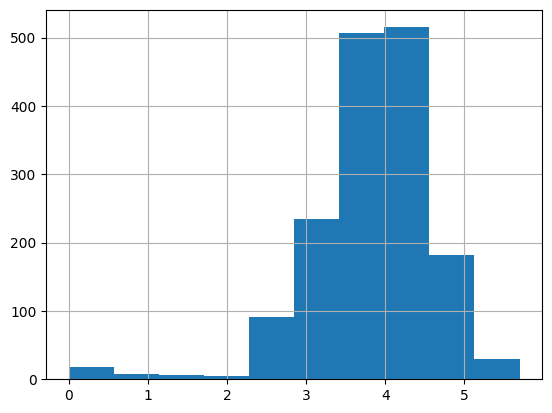

In [62]:
np.log( HG_census_result.WghtAcces).hist()

In [64]:
HG_census_result['logWgtAcc'] = np.log( HG_census_result.Accesbity )
HG_census_result2 = gpd.GeoDataFrame( HG_census_result , geometry = 'geometry', 
                                crs="EPSG:4326")
HG_census_result2.to_file(filename= r'/Users/yuhan/Desktop/Gradient_Boost_code/inputs/data_export/HG_census_access.shp',
                            driver='ESRI Shapefile')
